In [17]:
import pandas as pd

In [18]:
df1 = pd.read_csv("dataframeB005.csv")
df2 = pd.read_csv("dataframeB007.csv")

In [19]:
df1.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.0
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.0
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.0
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.0
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.0


In [20]:
df2.head()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,2008-04-02 15:25:41,1.891052,4.199360,-0.001866,23.937044,-0.0004,0.000,0.000,1.0
1,1,24,2008-04-02 15:25:41,1.891052,4.199497,-0.002139,23.924074,-0.0004,4.215,16.781,1.0
2,1,24,2008-04-02 15:25:41,1.891052,3.985606,-1.988778,24.004257,-2.0000,3.003,35.703,1.0
3,1,24,2008-04-02 15:25:41,1.891052,3.963247,-1.992558,24.162868,-2.0000,2.987,53.781,1.0
4,1,24,2008-04-02 15:25:41,1.891052,3.946647,-1.988491,24.346368,-2.0000,2.972,71.922,1.0


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1.drop('datetime', axis=1, inplace=True)

In [23]:
df2.drop('datetime', axis = 1, inplace = True)

In [24]:
df1.drop('capacity', axis = 1, inplace = True)
df2.drop('capacity', axis = 1, inplace = True)

In [25]:
df1.head()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.0
1,1,24,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.0
2,1,24,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.0
3,1,24,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.0
4,1,24,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.0


In [26]:
df2.head()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
0,1,24,4.199360,-0.001866,23.937044,-0.0004,0.000,0.000,1.0
1,1,24,4.199497,-0.002139,23.924074,-0.0004,4.215,16.781,1.0
2,1,24,3.985606,-1.988778,24.004257,-2.0000,3.003,35.703,1.0
3,1,24,3.963247,-1.992558,24.162868,-2.0000,2.987,53.781,1.0
4,1,24,3.946647,-1.988491,24.346368,-2.0000,2.972,71.922,1.0


In [27]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [29]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Extra Trees": ExtraTreesRegressor(random_state=42, n_estimators=100)
}

In [30]:
# Train and evaluate each model
performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    performance[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}")

Decision Tree - MSE: 0.0000, R²: 1.0000
Random Forest - MSE: 0.0000, R²: 1.0000
Gradient Boosting - MSE: 0.0000, R²: 0.9997
Extra Trees - MSE: 0.0000, R²: 1.0000


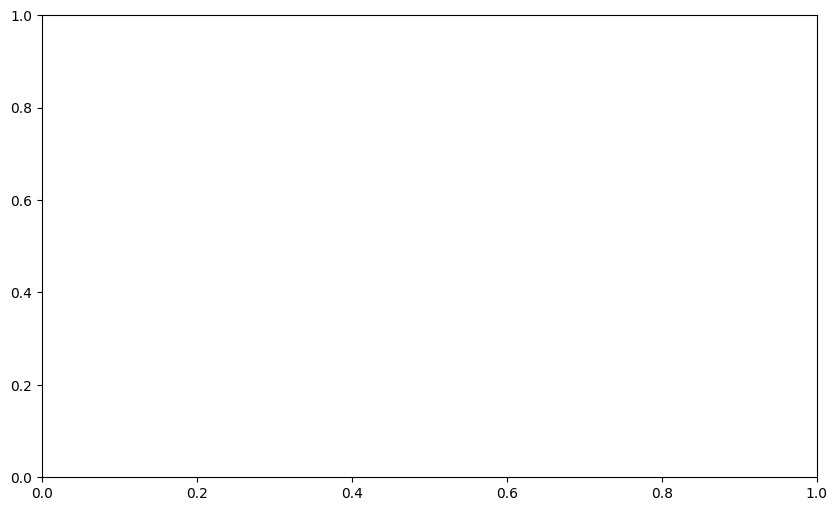

In [31]:
# Plot performance
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
mse_values = [performance[model]["MSE"] for model in models]
r2_values = [performance[model]["R2"] for model in models]

In [32]:
# Bar plots for MSE and R²
bar_width = 0.35
ax.bar(x - bar_width/2, mse_values, bar_width, label='MSE')
ax.bar(x + bar_width/2, r2_values, bar_width, label='R²')

<BarContainer object of 4 artists>

In [33]:
ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.set_ylabel('Score')
ax.set_title('Model Performance (Tree-Based Models)')
ax.legend()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Linear Regression Performance:
Mean Squared Error (MSE): 0.0002
R² Score: 0.9768


/var/folders/1r/7wp505r565s8_5rgnvmv3xxw0000gn/T/ipykernel_13163/76083089.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')


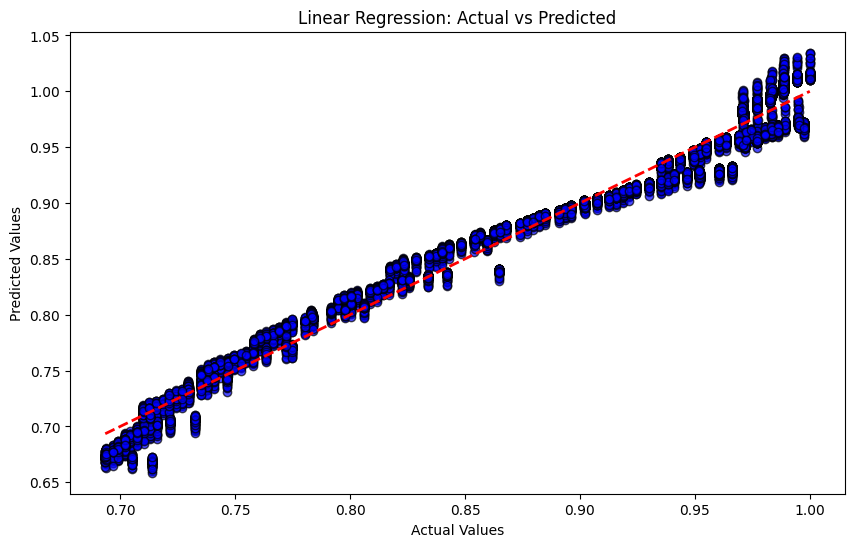

In [34]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

In [37]:
x_try = [126,24,3.7907011252127667,-1.9884286137688756,27.63395726059095,2.0,2.855,347.61]

In [41]:
x_try_2= [1,24,1.89105229539079,4.199359521791473,-0.0018658918833680202,23.93704394613529,-0.0004,0.0,0.0]

In [36]:
x_try2 = [2,24,1.880637027686859,3.534003040754616,-1.988822740822399,33.07677028304949,-2.0,2.602,1871.657]

In [46]:
x_try3 = [168,24,1.4324552720625434,3.292548602818005,-1.9885524842924716,36.60138738914052,2.0,2.354,2250.484,0.7574910940083355]

In [38]:

x_try3 = np.array(x_try).reshape(1, -1)

In [39]:
y_pred2 = lr_model.predict(x_try3)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
print(y_pred2)

[0.76118787]


In [4]:
file_path = "dis_ele_per_cycle.csv"  # Update with your file path
df = pd.read_csv(file_path)


In [5]:
df.head()

,cycle,datetime,capacity,SoH
0,1,2008-04-02 15:25:41,1.891052,1.000000
1,2,2008-04-02 19:43:48,1.880637,0.994492
2,3,2008-04-03 00:01:06,1.880663,0.994506
3,4,2008-04-03 04:16:37,1.880771,0.994563
4,5,2008-04-03 08:33:25,1.879451,0.993865


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
df1 = pd.read_csv("dataframeB005.csv")
df2 = pd.read_csv("dataframeB007.csv")

In [13]:
df1.tail()

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,SoH
50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.0,2781.312,0.713756
50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.0,2791.062,0.713756
50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.0,2800.828,0.713756
50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.0,2810.640,0.713756
50284,168,24,2008-05-27 20:45:42,1.325079,3.589937,-0.000583,34.405920,0.0006,0.0,2820.390,0.713756


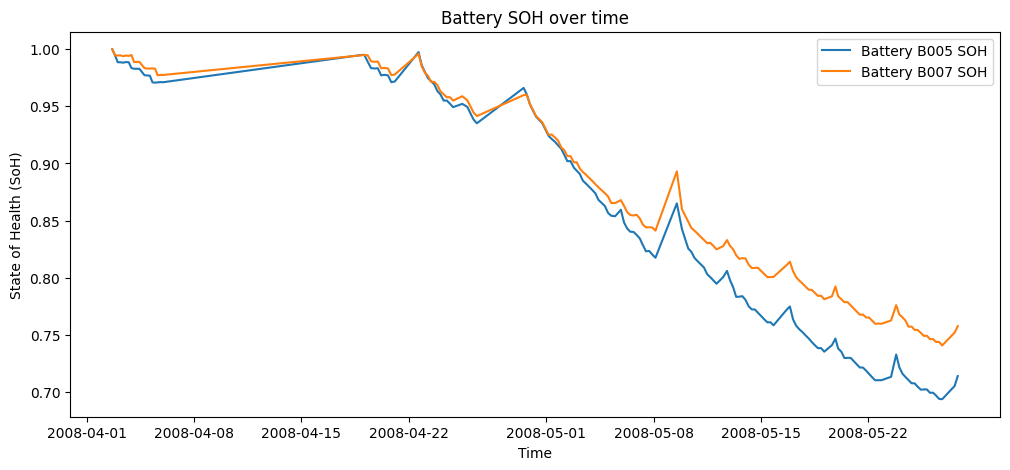

In [14]:


def preprocess_data(df):
    df['datetime'] = pd.to_datetime(df['datetime'])  # Ensure datetime format
    df.set_index('datetime', inplace=True)  # Set datetime as index
    return df

df1 = preprocess_data(df1)
df2 = preprocess_data(df2)

# Visualizing SOH over time
plt.figure(figsize=(12, 5))
plt.plot(df1.index, df1['SoH'], label='Battery B005 SOH')
plt.plot(df2.index, df2['SoH'], label='Battery B007 SOH')
plt.xlabel("Time")
plt.ylabel("State of Health (SoH)")
plt.legend()
plt.title("Battery SOH over time")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

ARIMA Forecast MSE: 0.0007


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported 

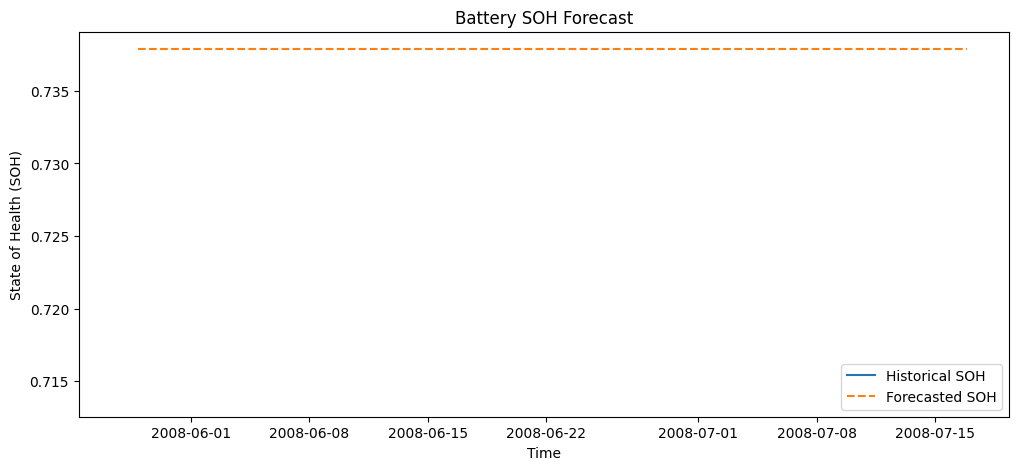

In [45]:

# Train-test split for forecasting
train, test = train_test_split(df1['SoH'], test_size=0.2, shuffle=False)

# ARIMA Forecasting model
model = ARIMA(train, order=(5,1,0))  # Auto-regressive model
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Evaluate forecast
mse = mean_squared_error(test, forecast)
print(f"ARIMA Forecast MSE: {mse:.4f}")

# Extend predictions into the future
def forecast_future(model, steps=50):
    future_forecast = model.forecast(steps=steps)
    return future_forecast

future_values = forecast_future(model_fit, steps=50)

# Plot future predictions
plt.figure(figsize=(12, 5))
plt.plot(df1.index[-100:], df1['SoH'][-100:], label='Historical SOH')
plt.plot(pd.date_range(df1.index[-1], periods=51, freq='D')[1:], future_values, label='Forecasted SOH', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("State of Health (SOH)")
plt.legend()
plt.title("Battery SOH Forecast")
plt.show()


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
df1 = pd.read_csv("dataframeB005.csv")
df2 = pd.read_csv("dataframeB007.csv")

def preprocess_data(df):
    df['datetime'] = pd.to_datetime(df['datetime'])  # Ensure datetime format
    df.set_index('datetime', inplace=True)  # Set datetime as index
    df = df.asfreq('D')  # Set frequency to daily
    df.interpolate(inplace=True)  # Fill missing values if any
    return df

df1 = preprocess_data(df1)
df2 = preprocess_data(df2)

# Visualizing SOH over time
plt.figure(figsize=(12, 5))
plt.plot(df1.index, df1['SOH'], label='Battery B005 SOH')
plt.plot(df2.index, df2['SOH'], label='Battery B007 SOH')
plt.xlabel("Time")
plt.ylabel("State of Health (SOH)")
plt.legend()
plt.title("Battery SOH over time")
plt.show()



ValueError: cannot reindex on an axis with duplicate labels

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast MSE: 0.0007


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported 

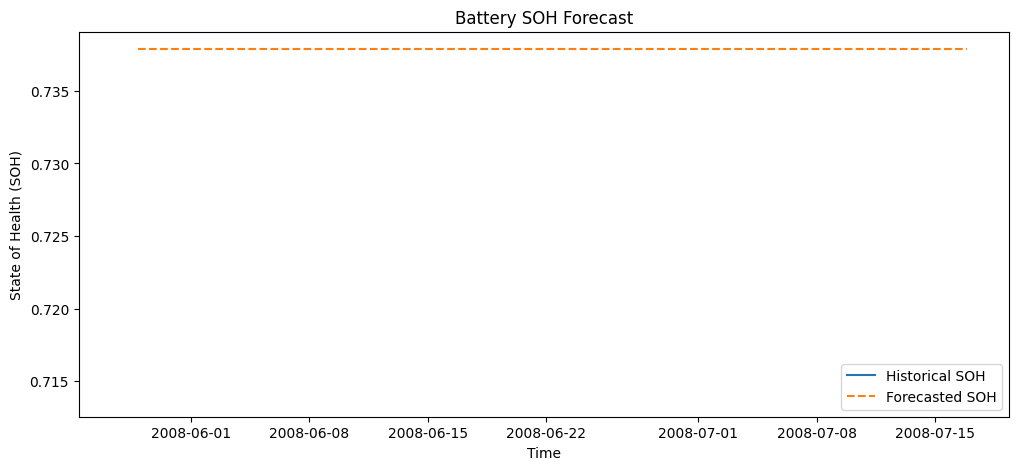

In [50]:
# Train-test split for forecasting
train, test = train_test_split(df1['SoH'], test_size=0.2, shuffle=False)

# ARIMA Forecasting model
model = ARIMA(train, order=(2,1,2), enforce_stationarity=False, enforce_invertibility=False)  # Adjusted order
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# Evaluate forecast
mse = mean_squared_error(test, forecast)
print(f"ARIMA Forecast MSE: {mse:.4f}")

# Extend predictions into the future
def forecast_future(model, steps=50):
    future_forecast = model.forecast(steps=steps)
    future_dates = pd.date_range(df1.index[-1], periods=steps+1, freq='D')[1:]
    return future_dates, future_forecast

future_dates, future_values = forecast_future(model_fit, steps=50)

# Plot future predictions
plt.figure(figsize=(12, 5))
plt.plot(df1.index[-100:], df1['SoH'][-100:], label='Historical SOH')
plt.plot(future_dates, future_values, label='Forecasted SOH', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("State of Health (SOH)")
plt.legend()
plt.title("Battery SOH Forecast")
plt.show()
